<a href="https://colab.research.google.com/github/Mmbsaksd/Health-Insurance-prediction-Analysis/blob/main/Health_Insurance_prediction_%26_Analysis_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

                                                                        Assignment

                                                           Health Insurance prediction & Analysis

a] Using the given dataset, can you make health-related predictions based on demographic and health data from insurance claims? Users can gain powerful insights into how demographic factors such as age, gender, BMI, blood pressure, diabetes, smoking status, and region affect insurance claims.
insurance_data.csv - Google Drive

- Research on
Determine the age, gender, BMI, and blood pressure trends in insurance claims.
Develop targeted marketing campaigns for high-risk customers.
Assess the correlation between health traits (such as BMI and blood pressure) and the likelihood of filing a claim

#**Data Preprocessing**

In [ ]:
#Connecting with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Insurance Tob/insurance_data.csv')
data.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [ ]:
data.shape

(1340, 11)

In [ ]:
# Check for missing values
print(data.isnull().sum())

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64


In [ ]:
data.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


#**Feature Engineering**

In [ ]:
data['region'].unique()

array(['southeast', 'northwest', nan, 'southwest', 'northeast'],
      dtype=object)

In [ ]:
# Calculate the mean age
mean_age = data['age'].mean()

# Impute missing values with the mean age
data['age'].fillna(mean_age, inplace=True)


# Impute missing values in the region column with the most frequent value
data['region'].fillna(data['region'].mode()[0], inplace=True)

In [ ]:
# Convert categorical variables to numerical
data['smoker'] = np.where(data['smoker']=='Yes', 1, 0)
data['gender'] = np.where(data['gender']=='male', 1, 0)
data['diabetic'] = np.where(data['diabetic']=='Yes', 1, 0)
region_mapping = {
    'southeast':1,
    'northwest':2,
    'southwest':3,
    'northeast':4
}
data['region'] = data['region'].replace(region_mapping)

In [ ]:
# Scale continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['age', 'bmi', 'bp']] = scaler.fit_transform(data[['age', 'bmi', 'bloodpressure']])

In [ ]:
df = data.copy()
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bp
0,0,1,8.316890e-02,1,-1.223525,91,1,0,0,1,1121.87,-0.276233
1,1,2,-1.270861e+00,1,-0.093203,87,0,0,0,1,1131.51,-0.626175
2,2,3,6.413976e-16,1,0.431004,82,1,0,0,1,1135.94,-1.063604
3,3,4,6.413976e-16,1,0.496530,80,0,0,0,2,1136.40,-1.238575
4,4,5,6.413976e-16,1,0.562056,100,0,0,0,2,1137.01,0.511138


#**Explorative Data Analysis**

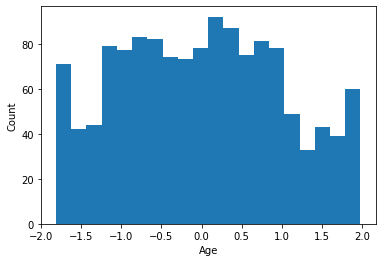

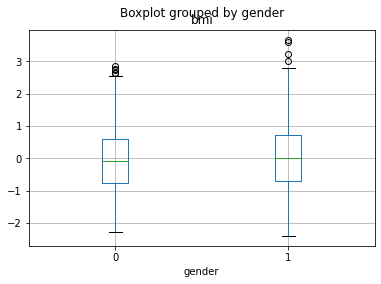

In [ ]:
import matplotlib.pyplot as plt

# Histogram of age
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Box plot of BMI by sex
data.boxplot(column='bmi', by='gender')
plt.show()

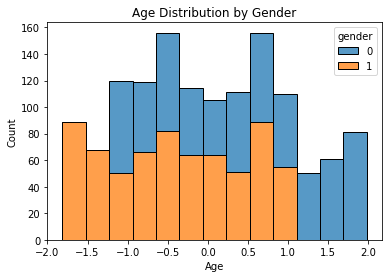

In [ ]:
# Age distribution
sns.histplot(data=df, x='age', hue='gender', multiple='stack')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


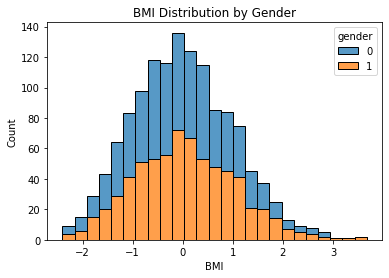

In [ ]:
# BMI distribution
sns.histplot(data=df, x='bmi', hue='gender', multiple='stack')
plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


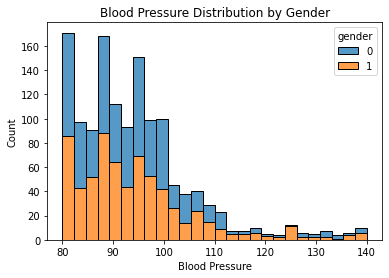

In [ ]:
# Blood pressure distribution
sns.histplot(data=df, x='bloodpressure', hue='gender', multiple='stack')
plt.title('Blood Pressure Distribution by Gender')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()


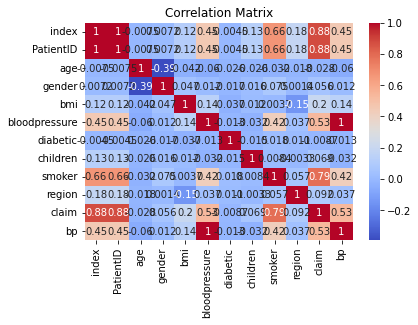

In [ ]:
# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

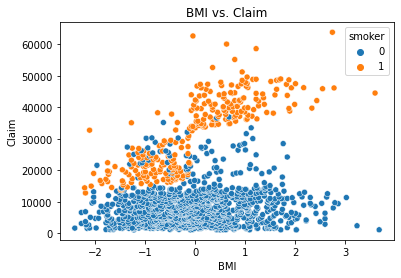

In [ ]:
# Scatterplot of BMI vs. claim
sns.scatterplot(data=df, x='bmi', y='claim', hue='smoker')
plt.title('BMI vs. Claim')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.show()

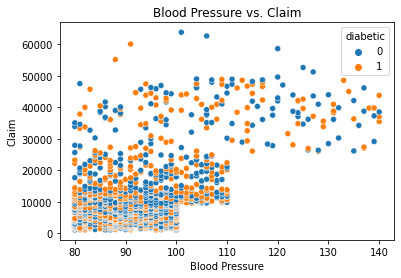

In [ ]:
# Scatterplot of blood pressure vs. claim
sns.scatterplot(data=df, x='bloodpressure', y='claim', hue='diabetic')
plt.title('Blood Pressure vs. Claim')
plt.xlabel('Blood Pressure')
plt.ylabel('Claim')
plt.show()

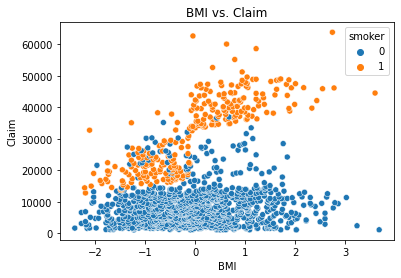

In [ ]:
# Scatterplot of BMI vs. claim
sns.scatterplot(data=df, x='bmi', y='claim', hue='smoker')
plt.title('BMI vs. Claim')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.show()

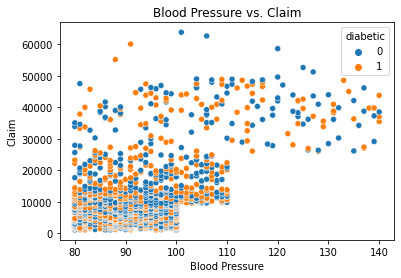

In [ ]:
# Scatterplot of blood pressure vs. claim
sns.scatterplot(data=df, x='bloodpressure', y='claim', hue='diabetic')
plt.title('Blood Pressure vs. Claim')
plt.xlabel('Blood Pressure')
plt.ylabel('Claim')
plt.show()

#**Model Building with HyperTuning**

In [ ]:
df.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim', 'bp'],
      dtype='object')

In [ ]:
# Prepare the data
X = data.drop(['index', 'PatientID', 'claim'], axis=1)
y = data['claim']


# Split the data into training and testing sets
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##**LinearRegression**

In [ ]:
# Create a linear regression model and train it on the training data

lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 42791790.04128251
R-squared Score: 0.7395464132016505


#**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model
model = DecisionTreeRegressor()

# Define hyperparameters for tuning
parameters = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4]}

# Create Grid Search Cross-Validation object
grid_search = GridSearchCV(model, parameters, cv=5)

# Fit Grid Search CV object to training data
grid_search.fit(X_train, y_train)

# Predict on test data using best model
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.7919359502226117
Mean Squared Error: 24505640.322614606
R-squared Score: 0.8508456432260074


##**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the random forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
rf_grid = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

# Train the model with the best hyperparameters
rf_model = rf_grid.best_estimator_
rf_model.fit(X_train, y_train)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best hyperparameters:", rf_grid.best_params_)
print("Best score:", rf_grid.best_score_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}
Best score: -27940237.93365296
Mean Squared Error: 24505640.322614606
R-squared Score: 0.8508456432260074


#**XGBoost Regressor**

In [ ]:
# Build the XGBoost regressor model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
params = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


# Train the XGBoost regressor with the best hyperparameters on the entire training set
xgb_reg_best = xgb.XGBRegressor(**grid_search.best_params_)
xgb_reg_best.fit(X_train, y_train)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Best hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 1}
Best score: -28914915.397724234
Mean Squared Error: 41291649.1807997
R-squared Score: 0.7486770681108883


##**Support Vector Regressor**

In [ ]:

# Build the SVR model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
parameters = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}

clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best hyperparameters:", clf.best_params_)
print("Best score:", clf.best_score_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Best hyperparameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Best score: 0.7122087510031594
Mean Squared Error: 41291649.1807997
R-squared Score: 0.7486770681108883


#**Model Evaluation And Selection**

In [ ]:
#Importing evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from math import sqrt

In [ ]:
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=2)
rf_model = RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=1000)
xgb_model = xgb.XGBRegressor(colsample_bytree=1, learning_rate=0.1, max_depth=3, min_child_weight=3, subsample=1)
svr_model = SVR(C=1, gamma='auto', kernel='poly')


In [ ]:
#Collect result and aggregating on Table

models = [lr_model,dt_model,rf_model, xgb_model,svr_model]

def model_metrics(models, xtrain, xtest, ytrain, ytest):
  cols = ['Model','Train MAE', 'Test MAE','Train RMSE', 'Test RMSE','Train R2 Square', 'Test R2 Square']
  model_df = pd.DataFrame(columns=cols)
  model_df.set_index('Model', inplace=True)

  i = 0
  for model in models:
    model.fit(xtrain,ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)

    model_df.loc[i,'Train MAE'] = mean_absolute_error(y_pred_train,ytrain).round(2)
    model_df.loc[i,'Test MAE']  = mean_absolute_error(y_pred_test,ytest).round(2)
    model_df.loc[i,'Train RMSE'] = sqrt(mean_squared_error(y_pred_train,ytrain).round(2))
    model_df.loc[i,'Test RMSE']  = sqrt(mean_squared_error(y_pred_test,ytest).round(2))
    model_df.loc[i,'Train R2 Square'] = r2_score(y_pred_train,ytrain).round(2)
    model_df.loc[i,'Test R2 Square'] = r2_score(y_pred_test,ytest).round(2)


    i += 1
  return model_df 

In [ ]:
model = {'Model':['Linear_Regression','Decision Tree','Random Forest','XGBRegressor', 'SVR']}
model_df = pd.DataFrame(model)
result_model = model_metrics(models, X_train, X_test, y_train, y_test)
result_model = pd.concat([model_df,result_model],axis=1)
result_table =  result_model.set_index('Model')
result_table

,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2 Square,Test R2 Square
Model,,,,,,
Linear_Regression,4966.04,4913.93,6592.444793,6541.543399,0.56,0.58
Decision Tree,3841.55,3613.27,5257.72074,4950.317194,0.76,0.82
Random Forest,3558.73,3661.39,4841.060793,4976.86064,0.8,0.82
XGBRegressor,3307.8,3637.68,4515.147407,4960.123053,0.82,0.82
SVR,4268.18,4534.8,6093.656277,6425.857856,0.62,0.61


<Axes: title={'center': 'Score Result'}, xlabel='Model'>

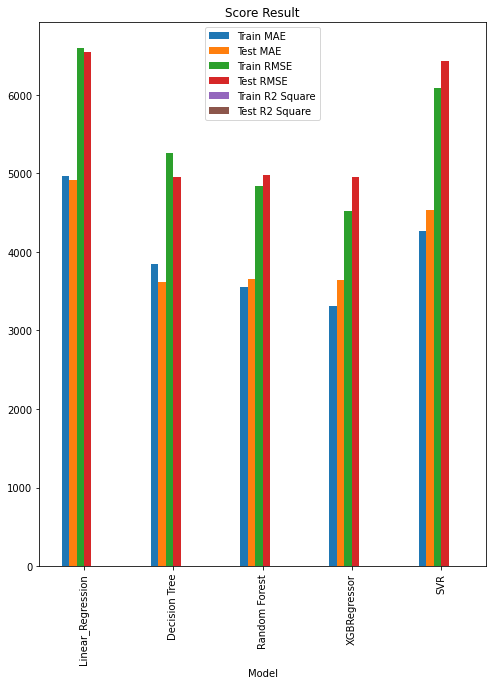

In [ ]:
#Ploting the graphical representation of result
result_model.plot(x='Model', y = ['Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE', 'Train R2 Square','Test R2 Square'], kind='bar', title = 'Score Result', figsize=(8,10) )

In [ ]:
#Installing the Shap pakage
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 23.9 MB/s eta 0:00:00


#**Model explainability**

In [ ]:
#Implimenting the shap explainer on random forest
import shap
shap.initjs()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


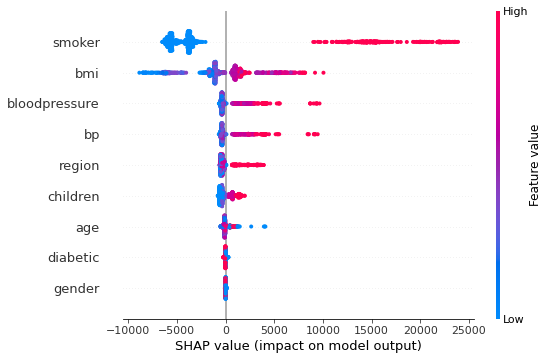

In [ ]:
#Feature importance ploting on Random Forest
explainer_train_dt = shap.TreeExplainer(rf_model)
shap_values_train_dt = explainer_train_dt(X_train)
shap.summary_plot(shap_values_train_dt, plot_type = 'dot')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


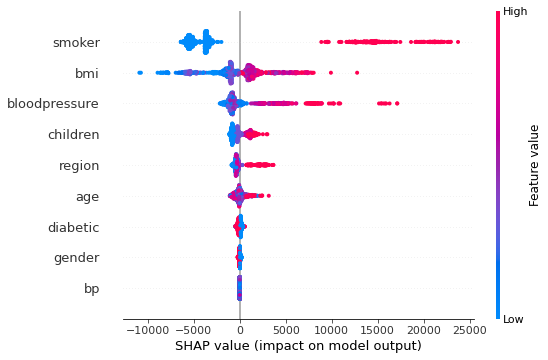

In [ ]:
#Feature importance ploting on Random Forest
explainer_train_dt = shap.TreeExplainer(xgb_model)
shap_values_train_dt = explainer_train_dt(X_train)
shap.summary_plot(shap_values_train_dt, plot_type = 'dot')